# $\omega^{2}$ vs $k^{3}$

This first long block of code is just being used to figure out how to do the analysis. This section only uses the preliminary tap water data (which was so scuffed)

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import math

In [3]:
h = 0.390
L = 1.78
dh = 0.0025    ## uncertainty in h
dL = 0.006     ## uncertainty in l
dd_m = 0.002   ## the uncertainty in the d measurement, i dont know what it is just guessing 2mm. (apparently +- 0.4mm)
y = 633 * 10**-9   ## laser wavelength

In [4]:
df2 = pd.read_csv("C:/Users/rabbi/Jupyter Stuff\year2/extendo_project/prelim_tap.csv")
df2.dropna(inplace = True)
df2.head()

,frequency,d_avg/mm
0,90,6.67
1,100,6.90
2,110,6.75
3,120,7.50
4,130,7.38


In [5]:
def wavenum(x):       ## defining a function to calculate the wavenmuber
    k = (h * (x*10**-3) * np.pi)/(y*(h**2+L**2))
    return k

In [6]:
def unc_k(d,h,l,A,B,C):     ## defining a function to calculate the error in k due to measurements
    dh = (-d*((h**2)-(L**2))/((h**2)+(l**2))**2)*A
    dl = ((-2*d*h*l)/((l**2+h**2)**2))*B
    dd = (h/((l**2)+(h**2)))*C
    return (np.pi/(633*10**-9))*(dh+dl+dd)

In [7]:
def ang_freq(f):      ## calculating the angular frequency
    w = 2*np.pi*f
    return w

In [8]:
df2["K (1/m)"] = wavenum(df2["d_avg/mm"])
df2["W (hz)"] = ang_freq(df2["frequency"])

In [9]:
dferr = pd.DataFrame(df2["K (1/m)"], columns=["unc_k (1/m)"]) 

In [10]:
dferr["unc_k (1/m)"] = unc_k(df2["d_avg/mm"]*10**-3,h,L,dh,dL,dd_m)
dferr.head(5)

,unc_k (1/m)
0,1163.464688
1,1163.382935
2,1163.436252
3,1163.169668
4,1163.212321


In [11]:
df2["K^3 (1/m^3)"] = wavenum(df2["d_avg/mm"])**3
df2["W^2 (hz^2)"] = ang_freq(df2["frequency"])**2
df2["K^3 (1/km^3)"] = df2["K^3 (1/m^3)"]*10**-9
df2["W^2 (khz^2)"] = df2["W^2 (hz^2)"]*10**-6
df2.head()

,frequency,d_avg/mm,K (1/m),W (hz),K^3 (1/m^3),W^2 (hz^2),K^3 (1/km^3),W^2 (khz^2)
0,90,6.67,3888.061439,565.486678,5.877591e+10,319775.182595,58.775909,0.319775
1,100,6.90,4022.132523,628.318531,6.506825e+10,394784.176044,65.068250,0.394784
2,110,6.75,3934.694860,691.150384,6.091625e+10,477688.853013,60.916252,0.477689
3,120,7.50,4371.883178,753.982237,8.356139e+10,568489.213503,83.561388,0.568489
4,130,7.38,4301.933047,816.814090,7.961427e+10,667185.257514,79.614274,0.667185


In [12]:
dferr["unc_k^3 (1/m^3)"] = dferr["unc_k (1/m)"]**3
dferr["unc_k^3 (1/km^3)"] = dferr["unc_k^3 (1/m^3)"]*10**-9
dferr.head(5)

,unc_k (1/m),unc_k^3 (1/m^3),unc_k^3 (1/km^3)
0,1163.464688,1.574924e+09,1.574924
1,1163.382935,1.574592e+09,1.574592
2,1163.436252,1.574809e+09,1.574809
3,1163.169668,1.573726e+09,1.573726
4,1163.212321,1.573899e+09,1.573899


In [13]:
def line(m,x,c):
    return m*x + c

In [14]:
vbf1, var1 = curve_fit(line, df2["K^3 (1/km^3)"],df2["W^2 (khz^2)"])

x1 = vbf1[0]
c1 = vbf1[1] 

err_x1 = np.sqrt(var1[0][0])
err_c1 = np.sqrt(var1[1][1])

print("x = {0:3.8f} +/- {2:3.8f} , c = {1:3.4f} +/- {3:3.4f}".format(x1,c1,err_x1,err_c1))

x = 0.05325537 +/- 0.01218119 , c = -2.9439 +/- 1.2662


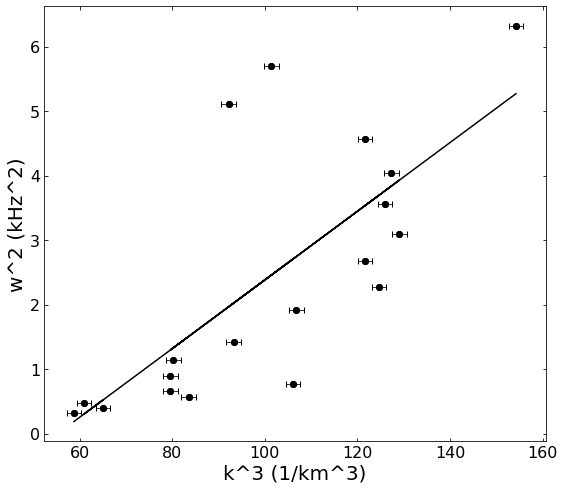

In [15]:
plt.rcParams['font.size'] = '16'

fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(1,1,1)

ax.plot(df2["K^3 (1/km^3)"],df2["W^2 (khz^2)"],'k.',markersize=12)

eb1 = plt.errorbar(df2["K^3 (1/km^3)"],df2["W^2 (khz^2)"],xerr = dferr["unc_k^3 (1/km^3)"],color='k',marker='o',lw=0.8,
                   capsize=3,linestyle = "none")

ax.set_ylabel('w^2 (kHz^2)',fontsize=20)
ax.set_xlabel('k^3 (1/km^3)',fontsize=20)

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.tick_params(axis="y", direction="in")
ax.tick_params(axis="x", direction="in")


ax.plot(df2["K^3 (1/km^3)"], line(df2["K^3 (1/km^3)"], *vbf1), "k-", lw = 1.5)  # using vbf to plot the trendline

#plt.savefig('Resonant_voltage1')
plt.show()

In [16]:
rho = 997.7

In [17]:
surft = rho * x1
err_surft = rho * err_x1
print("surface tension = ({0:1.1f} +/- {1:1.1f})mN/m".format(surft,err_surft))

surface tension = (53.1 +/- 12.2)mN/m


this gives a value of $53\pm12$mN/m, the accepted value of pure water is 72.8 so assuming that tap water is impure and that this impurity can effect the surface tension this much, our value is reasonable.

In [18]:
print("The intercept has a value at: ({0:1.1f} +- {1:1.1f})kHz^2".format(c1,err_c1))

The intercept has a value at: (-2.9 +- 1.3)kHz^2


if we take this intercept to be caused by some air motion (ripples caused by the frequency of the air) we find that there could already be ripples with a wavelength of $1.65$mm, this relates to a frequency of $270$Hz.

i can now look at the uncertainty of the intercept. i will do this using only functions as not to make it general.

by setting $\omega^{2} = 0$ we find the equation $k_{0}=(-c\frac{\rho}{\gamma})^{\frac{1}{3}}$, where c is the intercept, $\gamma$ is the surface tension and $\rho$ is the density, we can find the uncertainty of $k_{0}$ using the equation below.
$$ \partial k_{0} = \frac{1}{3}(c\rho\gamma^{-1})^\frac{1}{3}(c^{-1}dc + \gamma^{-1}d\gamma)$$

In [19]:
# def dk_0(c,r,y,dc,dy):        ## due to numpy being a lil shit, its not presice enough to do this formula apparently.
#     p1 = (1/3)*(c*r/y)**(1/3)  ## so use a calculator
#     p2 = (dc/c)+(dy/y)
#     return p1*p2

this gives $\partial k_{0} \approx 255.6$, so we have found $k_{0} = (3810\pm260)m^{-1}$. using the dispersion relation we can derive the equation below to describe the uncertainty in $\omega$ for some k.
$$ \partial \omega = \frac{1}{3}(\frac{3k_{0}^{2}\gamma dk_{0}+k_{0}^{3}d\gamma}{\rho})(\frac{\gamma}{\rho}k_{0}^{3})^\frac{-1}{2} $$


using this equation we find that there is some zero error in the angular frequency of $\omega_{0} = (1715\pm370)rads^{-1}$. This correlates to a driving frequency of $f_{0} = (270\pm59)Hz$

# now doing all the analysis together but less comments

This section uses the data collected on the 4th april.

In [20]:
h = 0.292
L = 1.673
dh = 0.002    ## uncertainty in h
dL = 0.004     ## uncertainty in l
dd_m = 0.0023   ## the uncertainty in the d measurement, i dont know what it is just guessing 2mm. (apparently +- 0.4mm)
y = 633 * 10**-9   ## laser wavelength

In [21]:
df_r = pd.read_csv("C:/Users/rabbi/Jupyter Stuff\year2/extendo_project/water_ripples.csv")
#df_water.dropna(inplace = True)
df_r

,frequency,water,salt,oil,fairy,toothpaste
0,110,5.20,4.61,NaN,5.13,5.50
1,120,4.86,5.31,NaN,5.90,5.75
2,130,4.29,5.23,NaN,6.33,6.21
3,140,4.60,5.45,NaN,6.55,6.38
4,150,5.14,5.72,NaN,7.00,6.75
5,160,5.27,6.00,NaN,7.20,7.08
6,170,5.57,6.18,NaN,7.60,7.45
7,180,5.67,6.58,NaN,8.00,7.91
8,190,5.75,6.77,NaN,8.25,8.00
9,200,6.11,7.21,NaN,8.63,8.10


In [22]:
dfw = pd.DataFrame(df_r["water"], columns=["water"])
dfs = pd.DataFrame(df_r["salt"], columns=["salt"]) 
dff = pd.DataFrame(df_r["fairy"], columns=["fairy"]) 
dft = pd.DataFrame(df_r["toothpaste"], columns=["toothpaste"]) 

In [23]:
df_r["W^2 (hz^2)"] = (ang_freq(df_r["frequency"]))**2
dfw["K^3 (1/m^3)"] = (wavenum(dfw["water"]))**3
dfs["K^3 (1/m^3)"] = (wavenum(dfs["salt"]))**3
dff["K^3 (1/m^3)"] = (wavenum(dff["fairy"]))**3
dft["K^3 (1/m^3)"] = (wavenum(dft["toothpaste"]))**3

In [24]:
df_r["W^2 (khz^2)"] = df_r["W^2 (hz^2)"]*10**-6
dfw["K^3 (1/km^3)"] = dfw["K^3 (1/m^3)"]*10**-9
dfs["K^3 (1/km^3)"] = dfs["K^3 (1/m^3)"]*10**-9
dff["K^3 (1/km^3)"] = dff["K^3 (1/m^3)"]*10**-9
dft["K^3 (1/km^3)"] = dft["K^3 (1/m^3)"]*10**-9

In [25]:
dfw["unc_k (1/m)"] = unc_k(dfw["water"]*10**-3,h,L,dh,dL,dd_m)
dfs["unc_k (1/m)"] = unc_k(dfs["salt"]*10**-3,h,L,dh,dL,dd_m)
dff["unc_k (1/m)"] = unc_k(dff["fairy"]*10**-3,h,L,dh,dL,dd_m)
dft["unc_k (1/m)"] = unc_k(dft["toothpaste"]*10**-3,h,L,dh,dL,dd_m)

In [26]:
dfw["unc_k^3 (1/km^3)"] = (dfw["unc_k (1/m)"]**3)*10**-9
dfs["unc_k^3 (1/km^3)"] = (dfs["unc_k (1/m)"]**3)*10**-9
dff["unc_k^3 (1/km^3)"] = (dff["unc_k (1/m)"]**3)*10**-9
dft["unc_k^3 (1/km^3)"] = (dft["unc_k (1/m)"]**3)*10**-9

In [27]:
def line(m,x,c):
    return m*x + c

In [28]:
vbfw, varw = curve_fit(line, dfw["K^3 (1/km^3)"],df_r["W^2 (khz^2)"])

xw = vbfw[0]
cw = vbfw[1] 

err_xw = np.sqrt(varw[0][0])
err_cw = np.sqrt(varw[1][1])

In [29]:
vbfs, var_s = curve_fit(line, dfs["K^3 (1/km^3)"],df_r["W^2 (khz^2)"])

xs = vbfs[0]
cs = vbfs[1] 

err_xs = np.sqrt(var_s[0][0])
err_cs = np.sqrt(var_s[1][1])

In [30]:
vbff, varf = curve_fit(line, dff["K^3 (1/km^3)"],df_r["W^2 (khz^2)"])

xf = vbff[0]
cf = vbff[1] 

err_xf = np.sqrt(varf[0][0])
err_cf = np.sqrt(varf[1][1])

In [31]:
vbft, vart = curve_fit(line, dft["K^3 (1/km^3)"],df_r["W^2 (khz^2)"])

xt = vbft[0]
ct = vbft[1] 

err_xt = np.sqrt(vart[0][0])
err_ct = np.sqrt(vart[1][1])

In [32]:
print("for water: x = {0:3.8f} +/- {2:3.8f} , c = {1:3.4f} +/- {3:3.4f}".format(xw,cw,err_xw,err_cw))
print("for salt: x = {0:3.8f} +/- {2:3.8f} , c = {1:3.4f} +/- {3:3.4f}".format(xs,cs,err_xs,err_cs))
print("for soap: x = {0:3.8f} +/- {2:3.8f} , c = {1:3.4f} +/- {3:3.4f}".format(xf,cf,err_xf,err_cf))
print("for toothpaste: x = {0:3.8f} +/- {2:3.8f} , c = {1:3.4f} +/- {3:3.4f}".format(xt,ct,err_xt,err_ct))

for water: x = 0.05616528 +/- 0.00872656 , c = -0.0774 +/- 0.1841
for salt: x = 0.03559222 +/- 0.00209142 , c = 0.0171 +/- 0.0650
for soap: x = 0.01757245 +/- 0.00038522 , c = 0.1431 +/- 0.0217
for toothpaste: x = 0.02019443 +/- 0.00092983 , c = 0.0844 +/- 0.0481


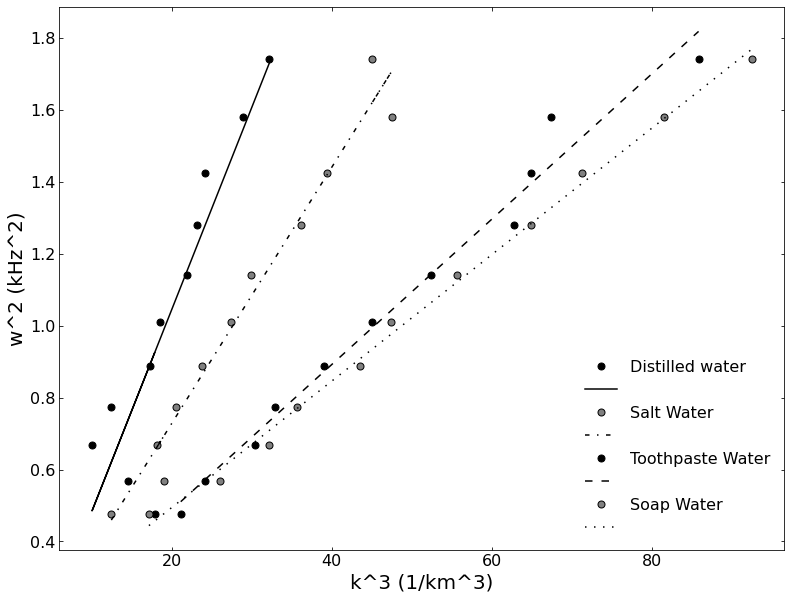

In [33]:
plt.rcParams['font.size'] = '16'

fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(1,1,1)

ax.plot(dfw["K^3 (1/km^3)"],df_r["W^2 (khz^2)"],"o",markersize=7,markerfacecolor='black', markeredgecolor='black', label = "Distilled water")
ax.plot(dfw["K^3 (1/km^3)"], line(dfw["K^3 (1/km^3)"], *vbfw), "k-", lw = 1.5,linestyle = "-", label = " ")  # using vbf to plot the trendline

ax.plot(dfs["K^3 (1/km^3)"],df_r["W^2 (khz^2)"],"o",markersize=7,markerfacecolor='gray', markeredgecolor='black', label = "Salt Water")
ax.plot(dfs["K^3 (1/km^3)"], line(dfs["K^3 (1/km^3)"], *vbfs), "k", lw = 1.5,linestyle = (0, (3, 5, 1, 5)), label = " ")   # using vbf to plot the trendline

ax.plot(dft["K^3 (1/km^3)"],df_r["W^2 (khz^2)"],"o",markersize=7,markerfacecolor='black', markeredgecolor='black', label = "Toothpaste Water")
ax.plot(dft["K^3 (1/km^3)"], line(dft["K^3 (1/km^3)"], *vbft), "k", lw = 1.5,linestyle = (0, (5, 6)), label = " ")  # using vbf to plot the trendline

ax.plot(dff["K^3 (1/km^3)"],df_r["W^2 (khz^2)"],"o",markersize=7,markerfacecolor='gray', markeredgecolor='black', label = "Soap Water")
ax.plot(dff["K^3 (1/km^3)"], line(dff["K^3 (1/km^3)"], *vbff), "k", lw = 1.5,linestyle = (0, (1, 5)), label = " ")   # using vbf to plot the trendline



# ebw = plt.errorbar(dfw["K^3 (1/km^3)"],df_r["W^2 (khz^2)"],xerr = dfw["unc_k^3 (1/km^3)"],color='k',marker='o',lw=0.8,
#                    capsize=3,linestyle = "none", markersize = 7, markerfacecolor='black', markeredgecolor='black')

# ebs = plt.errorbar(dfs["K^3 (1/km^3)"],df_r["W^2 (khz^2)"],xerr = dfs["unc_k^3 (1/km^3)"],color='k',marker='o',lw=0.8,
#                    capsize=3,linestyle = "none", markersize = 7, markerfacecolor='grey', markeredgecolor='black')

# ebf = plt.errorbar(dff["K^3 (1/km^3)"],df_r["W^2 (khz^2)"],xerr = dff["unc_k^3 (1/km^3)"],color='k',marker='s',lw=0.8,
#                    capsize=3,linestyle = "none", markersize = 7, markerfacecolor='black', markeredgecolor='black')

# ebt = plt.errorbar(dft["K^3 (1/km^3)"],df_r["W^2 (khz^2)"],xerr = dft["unc_k^3 (1/km^3)"],color='k',marker='s',lw=0.8,
#                    capsize=3,linestyle = "none", markersize = 7, markerfacecolor='grey', markeredgecolor='black')




ax.set_ylabel('w^2 (kHz^2)',fontsize=20)
ax.set_xlabel('k^3 (1/km^3)',fontsize=20)

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.tick_params(axis="y", direction="in")
ax.tick_params(axis="x", direction="in")


ax.legend(loc = "lower right",frameon=False)
plt.savefig('Dispersion')
plt.show()

In [34]:
surftw = rho * xw
surfts = rho * xs
surftf = rho * xf
surftt = rho * xt

err_surftw = rho * err_xw
err_surfts = rho * err_xs
err_surftf = rho * err_xf
err_surftt = rho * err_xt

print("surface tension of water = ({0:1.1f} +/- {1:1.1f})mN/m".format(surftw,err_surftw))
print("surface tension of salty water = ({0:1.1f} +/- {1:1.1f})mN/m".format(surfts,err_surfts))
print("surface tension of soapy water = ({0:1.2f} +/- {1:1.2f})mN/m".format(surftf,err_surftf))
print("surface tension of toothpaste in water = ({0:1.2f} +/- {1:1.2f})mN/m".format(surftt,err_surftt))

surface tension of water = (56.0 +/- 8.7)mN/m
surface tension of salty water = (35.5 +/- 2.1)mN/m
surface tension of soapy water = (17.53 +/- 0.38)mN/m
surface tension of toothpaste in water = (20.15 +/- 0.93)mN/m


assuming constant density

As i have described in the first section, we can find the $K_{0}$ offset by using the intercept values in the above equations, however for some reason trying to code a funtion which does that for us automatically is giving me an aneurysm, so i trust that you can just a caluclator a few times. 

$$ \partial \omega = \frac{1}{3}(\frac{3k_{0}^{2}\gamma dk_{0}+k_{0}^{3}d\gamma}{\rho})(\frac{\gamma}{\rho}k_{0}^{3})^\frac{-1}{2} $$

In [35]:
def w(r,y0,k0):
    return (((y0*10**-3)/r)*(k0**3))**(0.5)

In [36]:
def dw(w,k0,y0,dk0,dy0,r):
    p1 = 3*(k0**2)*(y0*10**-3)*dk0
    p2 = (k0**3)*(dy0*10**-3)
    return (1/3)*((p1+p2)/r)*1/w

In [37]:
k0w = 1112.1
k0s = 783.4
k0f = 2012
k0t = 1611

dk0w = 820.4
dk0s = 1007
dk0f = 117
dk0t = 330

In [38]:
w0w = w(rho,surftw,k0w)
w0s = w(rho,surfts,k0s)
w0f = w(rho,surftf,k0f)
w0t = w(rho,surftt,k0t)

dw0w = dw(w0w,k0w,surftw,dk0w,err_surftw,rho)
dw0s = dw(w0s,k0s,surfts,dk0s,err_surfts,rho)
dw0f = dw(w0f,k0f,surftf,dk0f,err_surftf,rho)
dw0t = dw(w0t,k0t,surftt,dk0t,err_surftt,rho)

# print("for water: w0 = {0:1.3f} +- {1:1.3f}".format(w0w,dw0w))
# print("for salty water: w0 = {0:1.3f} +- {1:1.3f}".format(w0s,dw0s))
# print("for soapy water: w0 = {0:1.3f} +- {1:1.3f}".format(w0f,dw0f))
# print("for toothpaste water: w0 = {0:1.3f} +- {1:1.3f}".format(w0t,dw0t))

g = np.pi*2

print("for water: f0 = {0:1.3f} +- {1:1.3f}".format(w0w/g,dw0w/g))
print("for salty water: f0 = {0:1.3f} +- {1:1.3f}".format(w0s/g,dw0s/g))
print("for soapy water: f0 = {0:1.3f} +- {1:1.3f}".format(w0f/g,dw0f/g))
print("for toothpaste water: f0 = {0:1.3f} +- {1:1.3f}".format(w0t/g,dw0t/g))

for water: f0 = 44.235 +- 34.924
for salty water: f0 = 20.820 +- 27.170
for soapy water: f0 = 60.211 +- 3.941
for toothpaste water: f0 = 46.247 +- 10.183


This means that there was a frequency of roughly $f_{0} = 50$Hz present in the experiment before the oscillator was turned on. This could be explained by air currents within the room, other vibrations caused by other activities within the building, tectonic action etc. This frequency could not be measured in the experiment because below about 80Hz this experiment showed no diffraction pattern (maybe, i could be remembering wrong but i messaged wendy about it)

taking the errors into consideration and kind of ignoring the salty water, the frequency range is: $56.2<f_{0}<56.4$